In [1]:
%matplotlib inline

## Questions from 601sp15

- Can you use Naive Bayes for a combination of discrete and real-values $X_{i}$?
- How can we easily model just 2 of n attributes as dependent?
- What does the decision surface of a Naive Bayes classifier look like?
- How would you select a subset of $X_{i}$'s?


based on http://scikit-learn.org/stable/modules/naive_bayes.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

without crossvalidation

In [3]:
iris = datasets.load_iris()
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print('Number of mislabeled points out of a total {total} points : {mislabeled}'
      .format(
          total=iris.data.shape[0],
          mislabeled=(iris.target != y_pred).sum())
     )

Number of mislabeled points out of a total 150 points : 6


with crossvalidation

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=1/3, random_state=0)
clf = gnb.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Number of mislabeled points out of a total {total} points : {mislabeled}'
      .format(
          total=y_test.shape[0],
          mislabeled=(y_test != y_pred).sum())
     )

Number of mislabeled points out of a total 50 points : 2


## draw classifier

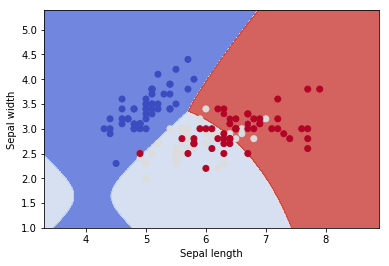

In [5]:
# we use only 2 from 4 features here to simplify visualization

clf = gnb.fit(X_train[:,:2], y_train)

# create a mesh to plot in
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .01  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8);
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm);
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');
plt.xlim(xx.min(), xx.max());
plt.ylim(yy.min(), yy.max());